## 1. Carga de los datos
En primer lugar se procede a importar los datos y conocer que columnas hay en el csv

In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats     # Calculos estadisticos que no proporciona numpy

In [2]:
# Cargar el dataset
df_origen = pd.read_csv('Wine.csv', sep=",")

In [3]:
df_origen.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
# Columnas
df_origen.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

Las columnas que aparecen son:
* **Alcohol**
* **Malic acid**
* **Ash**
* **Alcalinity of ash**
* **Magnesium**
* **Total phenols**
* **Flavanoids**
* **Nonflavanoid phenols**
* **Proanthocyanins**
* **Color intensity**
* **Hue**
* **OD280/OD315 of diluted wines**
* **Proline**
* **Customer_Segment** Sería la variable a predecir


## 2. Análisis Exploratorio de Datos (EDA)

Antes de plantearse construir cualquier modelo conviene estudiar e investigar los datos para comprenderlos mejor, ver en qué se caracterizan y con ello poder hacerse preguntas sobre los mismos que puedan responderse con el uso de distintos modelos de ML. 

In [5]:
df_origen_stats_df = df_origen.describe().T
# Calculamos la asimetría
skew_values = list()
for num_col in df_origen_stats_df.index:
    num_col_skew = stats.skew(df_origen[num_col])
    skew_values.append(num_col_skew)
df_origen_stats_df['skew'] = skew_values
df_origen_stats_df

,count,mean,std,min,25%,50%,75%,max,skew
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83,-0.051047
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80,1.030869
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23,-0.175207
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00,0.211247
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00,1.088915
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88,0.085907
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08,0.025129
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66,0.446349
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58,0.512769
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00,0.861248


In [6]:
#df_origen = dataset_mat.drop(["Customer_Segment"], axis=1)
df_origen.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


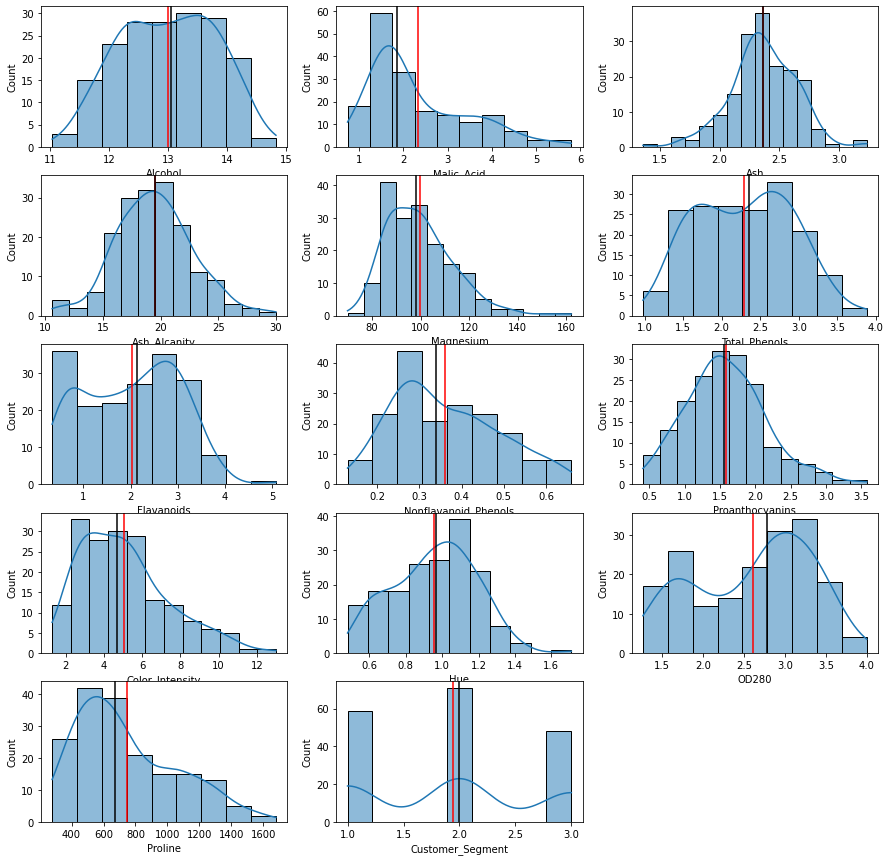

In [7]:
# Histograma para representar la evolución de las variables
fig = plt.figure(figsize=(15,15))

for i, num_col in enumerate(df_origen_stats_df.index):
    fig.add_subplot(5,3,1+i)
    sns.histplot(x=df_origen[num_col], kde=True)
    
    mean_value = df_origen[num_col].mean()  # Media
    plt.axvline(x=mean_value, c='red')
    
    median_value = df_origen[num_col].median() # Mediana
    plt.axvline(x=median_value, c='black')


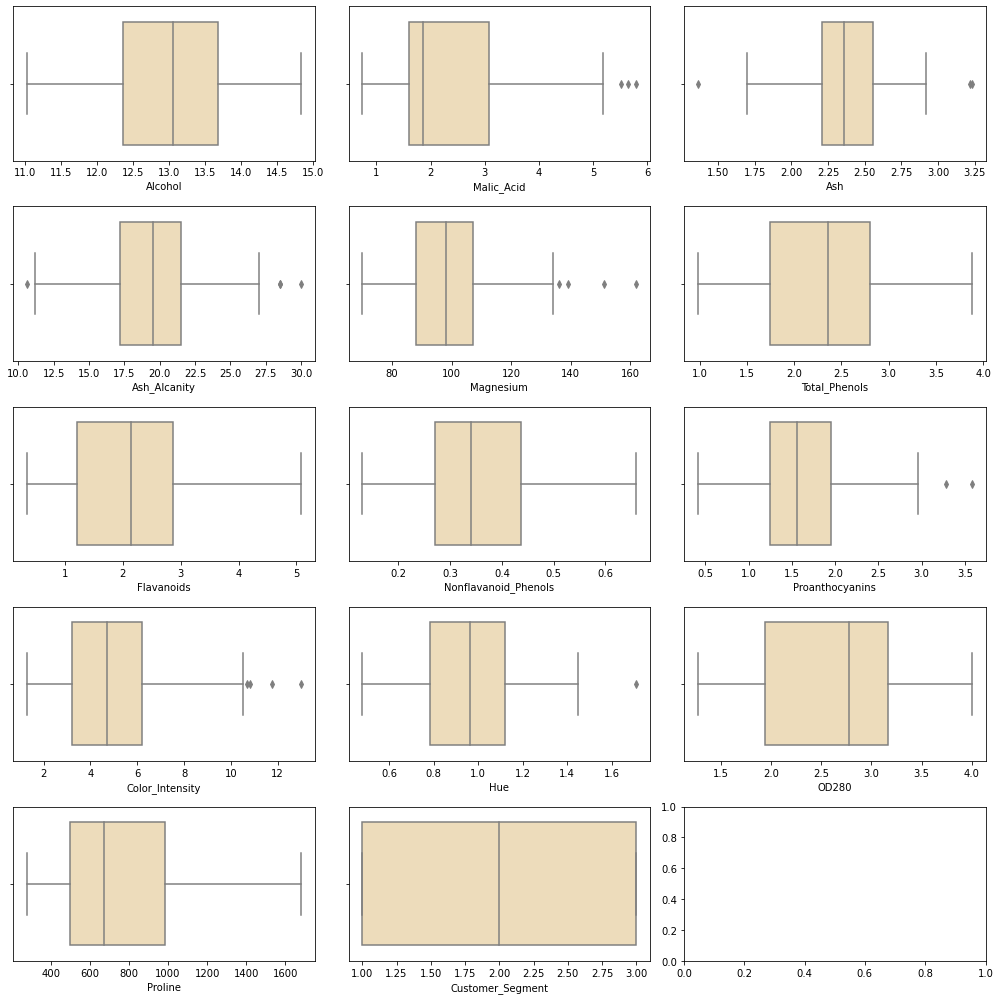

In [8]:
# Box plot for each attribute
fig, ax = plt.subplots(5,3, figsize=(14,14))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i,c in enumerate(df_origen.columns):
    #sns.boxplot(data=df_origen[c], ax = axes_[i], color = 'wheat', orient='h')
    sns.boxplot(x=df_origen[c], ax = axes_[i], color = 'wheat', orient='h')
    plt.tight_layout()

Lo primero que vimos con los analisis anteriores es que las caracteristicas tienen escalas diferentes.

Se pueden aplicar diagramas de dispersión bivariados fáciles de codificar, para darnos una idea de lo que está sucediendo.

<AxesSubplot:xlabel='Alcohol', ylabel='Customer_Segment'>

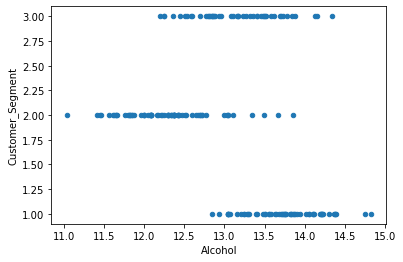

In [9]:
df_origen.plot.scatter(x = 'Alcohol', y = 'Customer_Segment')

Se puede ver que un nivel más bajo de alcohol (~ 11.5 a 12) existe una probabilidad muy alta de ser del segmento 2. ¿Por qué solo casualidad? ¿Por qué no certeza? 

Esto se debe a que, en casos excepcionales (no aquí), el conjunto de prueba es diferente al de entrenamiento del modelo. En ese conjunto de prueba, puede haber un valor atípico (aunque no debería haberlo porque vemos que ningún otro segmento está por debajo de 12, pero por si acaso) donde el nivel de alcohol está por debajo de 12 y el segmento es 3 (o 1). De los niveles de alcohol 13 a 14, es más fácil decir que el vino tiene una probabilidad muy baja de estar en el segmento 2. 

Sin embargo, no se puede decir con certeza si hay una mayor probabilidad de que el vino pertenezca al segmento 1 o al 3. Se necesitamos información de otras características en este caso.

<AxesSubplot:xlabel='Malic_Acid', ylabel='Customer_Segment'>

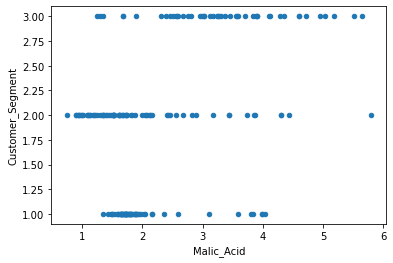

In [10]:
df_origen.plot.scatter(x = 'Malic_Acid', y = 'Customer_Segment')

Aqui la distribución para los segmentos es diferente, porque hay variedad en los diferentes niveles Malic_Acid, más en unos que otros.

<AxesSubplot:xlabel='Proline', ylabel='Customer_Segment'>

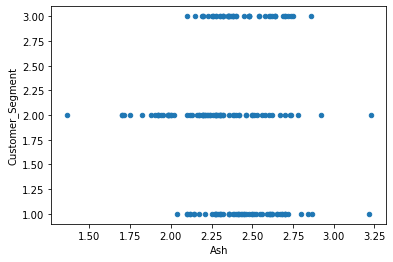

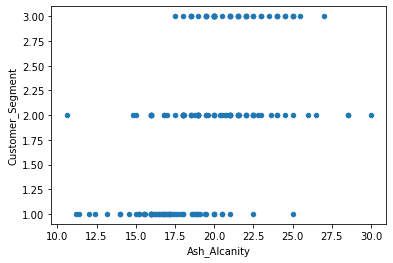

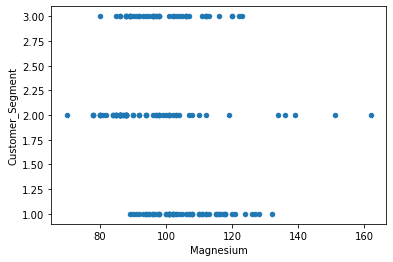

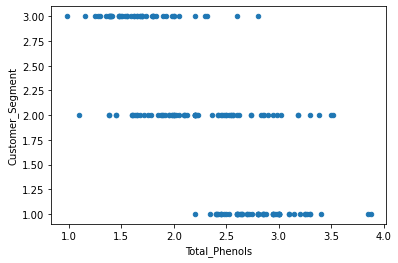

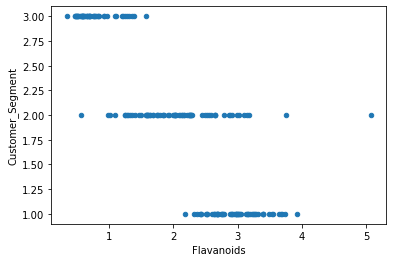

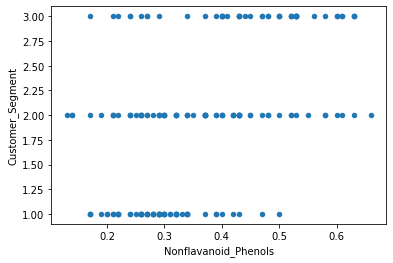

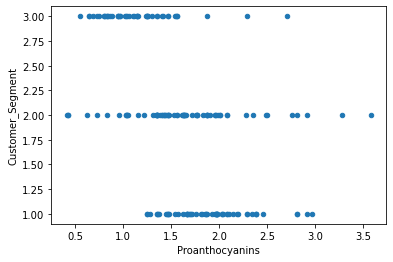

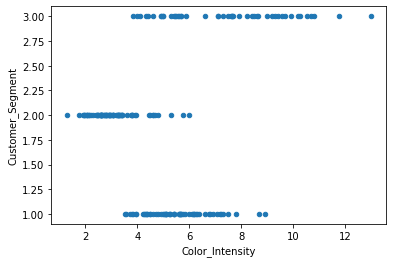

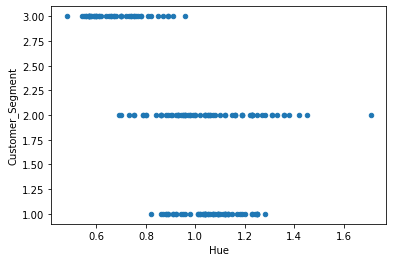

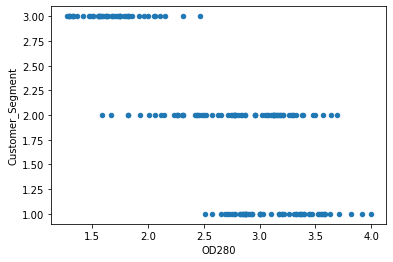

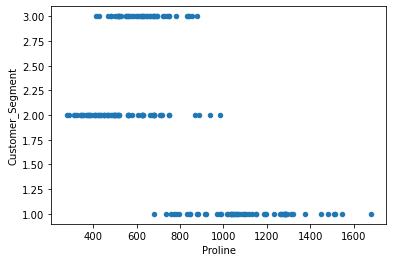

In [11]:
col = "Customer_Segment"
df_origen.plot.scatter(x = 'Ash', y = col)
df_origen.plot.scatter(x = 'Ash_Alcanity', y = col)
df_origen.plot.scatter(x = 'Magnesium', y = col)
df_origen.plot.scatter(x = 'Total_Phenols', y = col)
df_origen.plot.scatter(x = 'Flavanoids', y = col)
df_origen.plot.scatter(x = 'Nonflavanoid_Phenols', y = col)
df_origen.plot.scatter(x = 'Proanthocyanins', y = col)
df_origen.plot.scatter(x = 'Color_Intensity', y = col)
df_origen.plot.scatter(x = 'Hue', y = col)
df_origen.plot.scatter(x = 'OD280', y = col)
df_origen.plot.scatter(x = 'Proline', y = col)


Se ven comportamentos extraños en las relaciones entre las variables con el segmento.

## Selección de caracteristicas

Se construirá un modelo rudimentario con todas las características (hasta que se identificque específicamente que una característica está explícitamente relacionada con alguna otra característica). Luego, según los resultados de la evaluación del modelo, elimine las características si es necesario. Se trata de tener una idea de un experimento que tenga todas las funciones y luego hacer ingeniería de funciones.

En pocas palabras:seleccionemos las características y la ingeniería de características al final del flujo de trabajo. El modelo se puede volver a entrenar entonces y se pueden observar diferencias.

In [12]:
# Separando la información de 2 grupos (todas las caracteristicas)
datos = df_origen.values #convertir su DataFrame en algo tangible que pueda manipularse.
Y = datos[:, 13]
X = datos[:, 0:12]

In [13]:
# Un aspecto importante de la evaluación del modelo es probar los datos en algunos datos de prueba. 
# Dado que no se proporciona ningún conjunto de prueba explícito, hacemos nuestra propi0 set de prueba. 
# Sin embargo, tenga cuidado de que debe realizarse antes de entrenar el modelo. 
# ¿Por qué? Porque si se usa para entrenar el modelo, el modelo se ajustará para darle las etiquetas correctas 
# (y la precisión de su modelo será del 100%, ¡genial!). 
# Sin embargo, queremos modelos que funcionen con la mayor precisión posible en el equipo de prueba, 
# sintonizados con él. 
# Esto aumenta la confiabilidad del modelo. 

# train_test_split es el divisor que usaremos. 
# Toma todo el conjunto de características X y el conjunto de etiquetas Y como parámetros, 
# define test_size = 0.30 como el tamaño fraccionario deseado del tamaño de prueba (30% del tamaño total del conjunto). 
# random_state = 1 es un método para decirle a la función la cantidad de aleatoriedad que deseamos. 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [14]:
# Caracteristicas de los datos
df_origen.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [15]:
# Observe esto con atención. Las desviaciones medias y estándar de algunas características son mucho mayores 
# que las de otras características. Esto implica que las características están en diferentes escalas. 
# ¿Complica esto? Debo decir que depende. Si está familiarizado con las matemáticas detrás del algoritmo 
# más simple para encontrar una solución: descenso de gradiente, sabrá que su objetivo es encontrar el 
# valor óptimo de cada característica para minimizar el error en la predicción. 

# Entonces, básicamente, asuma que tiene dos características (ayb) y el valor óptimo de la función está en 
# a = 0.5 y b = 100. Ahora deje que el rango de a sea de -5 a 5 y el rango de b sea de -500 a 500 
# (puede detectar esta diferencia en el rango mediante valores totalmente diferentes de desviaciones estándar). 
# El descenso de gradientes da pequeños pasos hasta su valor óptimo.

# El problema se reduce al hecho de que: si da pasos pequeños (digamos 0.1), a bajaría más rápido de a = 5 a 0.5 
# (restando 0.1 en cada iteración) que b (que debe bajar a 100 de 500 restando 0.1). En pocas palabras, 
# el algoritmo se vuelve más lento si los rangos son diferentes (¡demasiado diferentes!). 

# Escalación o normalización para corregir, lo hacemos a continuación:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

Para normalizar una característica, calculamos su media M y su desviación estándar SD. 
Luego restamos M de cada valor de característica y dividimos el resultado por SD. 
Esto hace que los datos se centren alrededor del origen.

In [16]:
# Modelos de predicción a aplicar
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
ppn = Perceptron(max_iter = 1500, eta0 = 0.1, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 1.0

Confusion matrix: 
[[23  0  0]
 [ 0 19  0]
 [ 0  0 12]]

Classification report: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        23
         2.0       1.00      1.00      1.00        19
         3.0       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



Perceptron () crea un objeto de la clase Perceptron, enviando los parámetros max_iter, eta0 y random_state a su constructor, donde, **max_iter**: es el número máximo de iteraciones que le damos al clasificador para que converja en una solución, **eta0:** es el parámetro que define el tamaño de los pequeños pasos que se deben dar para converger al descenso de gradiente.

La función **fit()** entrena el modelo y la función **predict()** predice las etiquetas correspondientes a los ejemplos en X_test. 

Utilizamos tres métricas para informar el rendimiento de este modelo: 
**Precisión**: indica la fracción de ejemplos en X_test que se clasificaron correctamente. 
**Matriz de confusión:** una matriz que indica el número de ejemplos en una matriz en función de las clases predichas y reales. **Informe de clasificación:** la precisión, la recuperación y la puntuación F1 relacionados con cada clase. 

En términos normales, tomando por ejemplo la clase **y = 1**, 
**Precisión:** todos los ejemplos para los que hemos predicho y = 1, cuántos pertenecen realmente a la clase 1. 
**Recall**: todos los ejemplos que realmente pertenecen a la clase y = 1, ¿cuántos hemos predicho que serán de la clase y = 1? **F1**: un número (basado en la precisión P y la recuperación R) que se puede usar por sí solo para comparar el desempeño de dos modelos (un puntaje F1 más alto implica un mejor desempeño). **F1 = (2 * R * P) / (R + P)**

In [17]:
# Regresión logística, parecido al perceptron, solo que se le agrega la regularizacion (C)
from sklearn.linear_model import LogisticRegression
ppn = LogisticRegression(C = 100, max_iter = 1500, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 1.0

Confusion matrix: 
[[23  0  0]
 [ 0 19  0]
 [ 0  0 12]]

Classification report: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        23
         2.0       1.00      1.00      1.00        19
         3.0       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [18]:
## Arbol de decision
from sklearn.tree import DecisionTreeClassifier
ppn = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 0.9814814814814815

Confusion matrix: 
[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]

Classification report: 
              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98        23
         2.0       1.00      0.95      0.97        19
         3.0       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [19]:
# SVM - Support Vector Machines
from sklearn.svm import SVC
ppn = SVC(C= 10000, kernel = 'rbf', degree = 3)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 0.9814814814814815

Confusion matrix: 
[[23  0  0]
 [ 0 19  0]
 [ 0  1 11]]

Classification report: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        23
         2.0       0.95      1.00      0.97        19
         3.0       1.00      0.92      0.96        12

    accuracy                           0.98        54
   macro avg       0.98      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



¿Cuál es la relación entre los diferentes atributos? 
Podemos usar la función corrplot () para crear una visualización gráfica de una matriz de correlación.

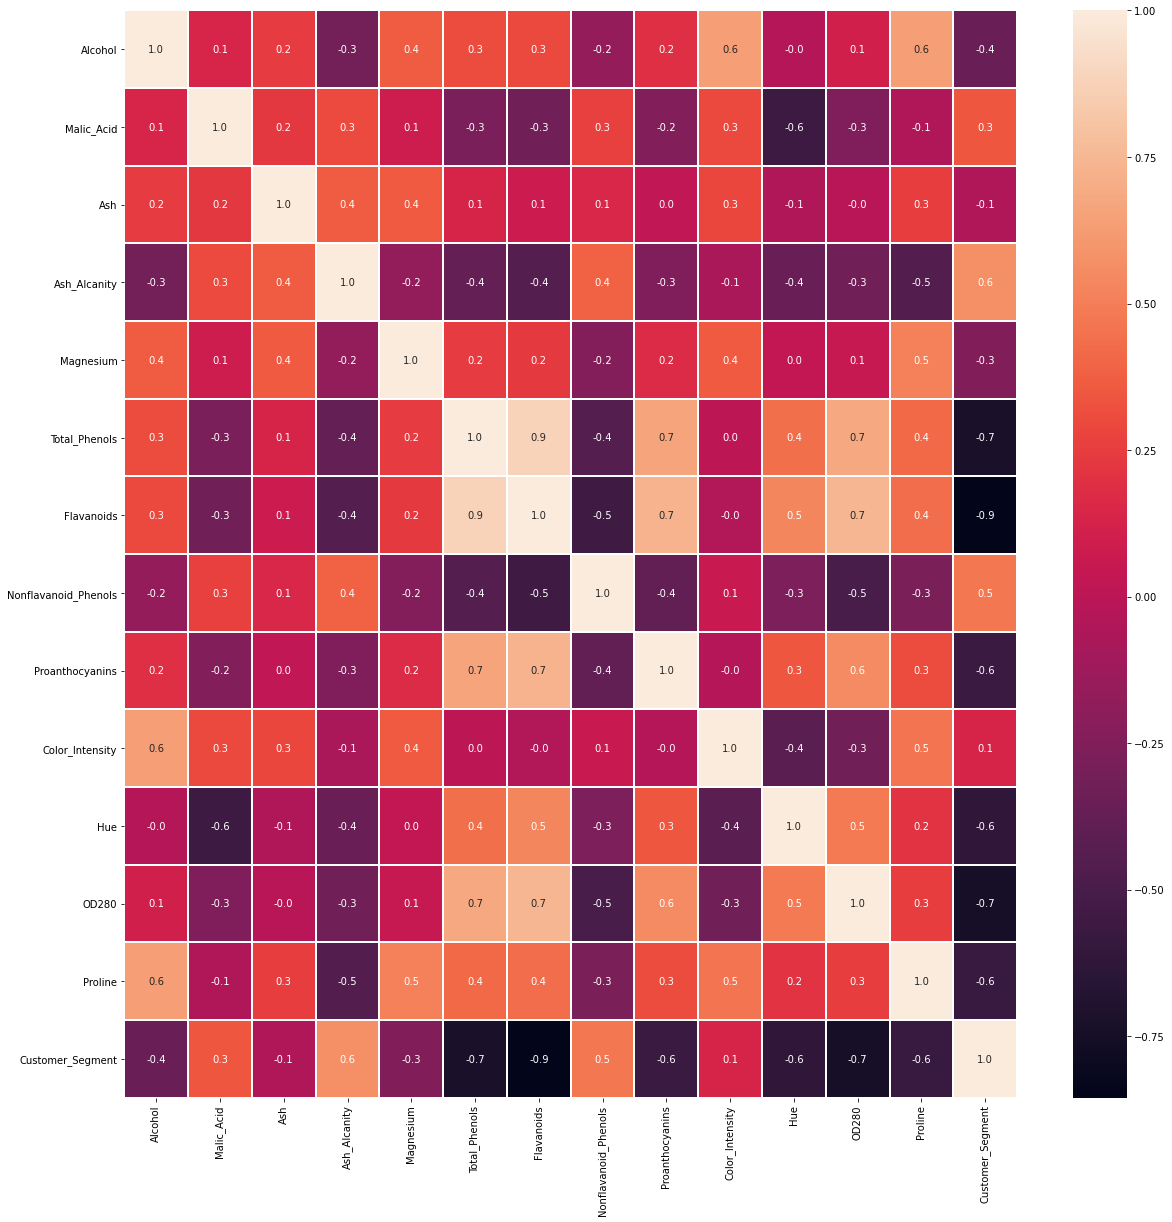

In [20]:
# Correlation matrix
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_origen.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

Existe una alta correlación lineal entre Total_Phenols, lavanoids, Proanthocyanins y OD280. Existe una relación lineal alta entre Alcohol, Color_Intensity y Proline. Ahora podemos eliminar algunas de esas variables para evitar información redundante que pueda afectar los resultados de nuestro análisis.

In [21]:
df_origen = df_origen.drop(["Flavanoids","Proanthocyanins","Color_Intensity","OD280","Proline"], axis=1)
df_origen.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Hue,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,0.28,1.04,1
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.05,1
2,13.16,2.36,2.67,18.6,101,2.80,0.30,1.03,1
3,14.37,1.95,2.50,16.8,113,3.85,0.24,0.86,1
4,13.24,2.59,2.87,21.0,118,2.80,0.39,1.04,1


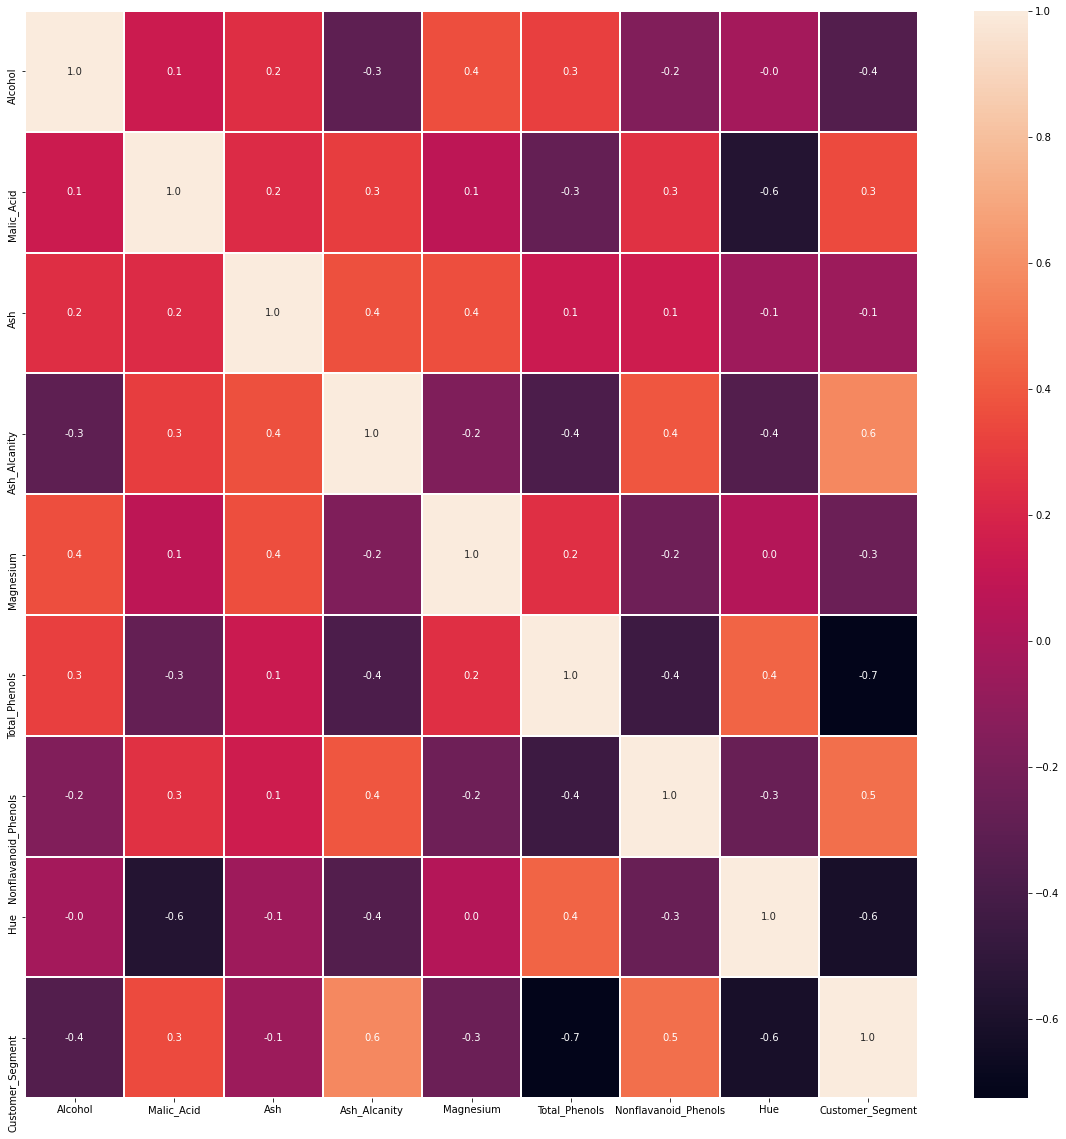

In [22]:
# Correlation matrix  # Con las variables eliminadas
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_origen.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

In [23]:
#Data Scalation
from sklearn import preprocessing
df_escalado = preprocessing.StandardScaler().fit_transform(df_origen)
df_escalado = pd.DataFrame(df_escalado, columns=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols','Nonflavanoid_Phenols','Hue', 'Customer_Segment'])
df_escalado.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Hue,Customer_Segment
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,-0.659563,0.362177,-1.213944
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,-0.820719,0.406051,-1.213944
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,-0.498407,0.318304,-1.213944
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,-0.981875,-0.427544,-1.213944
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.226796,0.362177,-1.213944


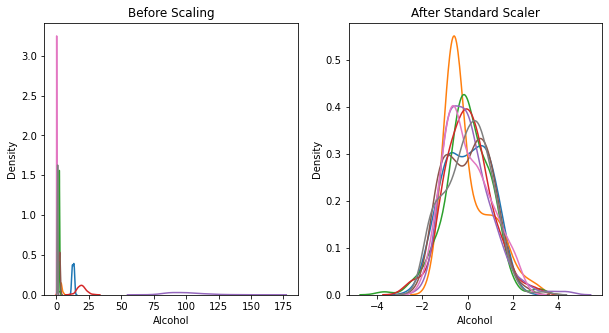

In [24]:
# Visualization of scaled and unscaled data
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df_origen['Alcohol'], ax=ax1)
sns.kdeplot(df_origen['Malic_Acid'], ax=ax1)
sns.kdeplot(df_origen['Ash'], ax=ax1)
sns.kdeplot(df_origen['Ash_Alcanity'], ax=ax1)
sns.kdeplot(df_origen['Magnesium'], ax=ax1)
sns.kdeplot(df_origen['Total_Phenols'], ax=ax1)
sns.kdeplot(df_origen['Nonflavanoid_Phenols'], ax=ax1)
sns.kdeplot(df_origen['Hue'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(df_escalado['Alcohol'], ax=ax2)
sns.kdeplot(df_escalado['Malic_Acid'], ax=ax2)
sns.kdeplot(df_escalado['Ash'], ax=ax2)
sns.kdeplot(df_escalado['Ash_Alcanity'], ax=ax2)
sns.kdeplot(df_escalado['Magnesium'], ax=ax2)
sns.kdeplot(df_escalado['Total_Phenols'], ax=ax2)
sns.kdeplot(df_escalado['Nonflavanoid_Phenols'], ax=ax2)
sns.kdeplot(df_escalado['Hue'], ax=ax2)
plt.show()

In [25]:
df_origen.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Nonflavanoid_Phenols', 'Hue', 'Customer_Segment'],
      dtype='object')

In [26]:
# Separando la información de 2 grupos  # Usar el df_origen o el df_escalado
datos = df_origen.values #convertir su DataFrame en algo tangible que pueda manipularse.
Y_nuevo = datos[:, 8]  # Al eliminar columnas que no aportaban
X_nuevo = datos[:, 0:7]

Iteration Nº Clusters: k: 1
Iteration Nº Clusters: k: 2
Iteration Nº Clusters: k: 3
Iteration Nº Clusters: k: 4
Iteration Nº Clusters: k: 5
Iteration Nº Clusters: k: 6
Iteration Nº Clusters: k: 7
Iteration Nº Clusters: k: 8
Iteration Nº Clusters: k: 9
Iteration Nº Clusters: k: 10
Iteration Nº Clusters: k: 11
Iteration Nº Clusters: k: 12
Iteration Nº Clusters: k: 13
Iteration Nº Clusters: k: 14
Iteration Nº Clusters: k: 15
Iteration Nº Clusters: k: 16
Iteration Nº Clusters: k: 17


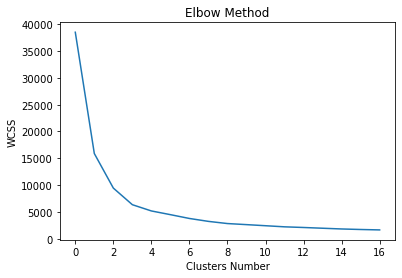

In [27]:
#Ahora vamos a identificar el mejor número de clúster para nuestros datos usando el método del codo.
from sklearn.cluster import KMeans
def elbow_method(epsilon, figure=False):
    wcss = [] 
    diff = np.inf
    i = 1
    
    while diff > epsilon:
        print("Iteration Nº Clusters: k: {k}".format(k=i))
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,n_init = 10, random_state = 0)
        kmeans.fit(X_nuevo)
        if diff == np.inf:
            diff = kmeans.inertia_
        elif kmeans.inertia_ == 0:
            wcss.append(kmeans.inertia_)
            break
        else:
            diff = (wcss[-1] - kmeans.inertia_)/wcss[-1]
        wcss.append(kmeans.inertia_)
        i += 1
        
    if figure:
        plt.plot(range(0,len(wcss)), wcss)
        plt.title('Elbow Method')
        plt.xlabel('Clusters Number')
        plt.ylabel('WCSS')
        plt.show()
    k = i-1
    return wcss, k

# Results Plot
epsilon = 0.05 
wcss, _ = elbow_method(epsilon, figure=True)

In [49]:
# Optimal K value
epsilon = 0.5
_, k = elbow_method(epsilon, figure=False)

Iteration Nº Clusters: k: 1
Iteration Nº Clusters: k: 2
Iteration Nº Clusters: k: 3


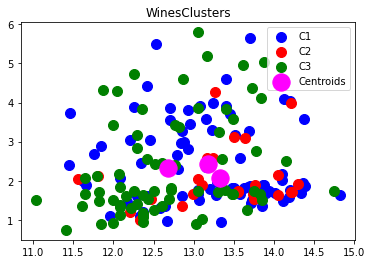

In [50]:
# K-means
kmeans = KMeans(n_clusters = k, init= 'k-means++', max_iter = 300, n_init =10, random_state = 1)
y_kmeans = kmeans.fit_predict(X)

### Plot clusters 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue',label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red',label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green',label = 'C3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan',label = 'C4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'magenta', label = 'Centroids')
plt.title('WinesClusters')
#plt.xlabel('X1: Alcohol')
#plt.ylabel('X2: Malic_Acid')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Alcohol', ylabel='Ash'>

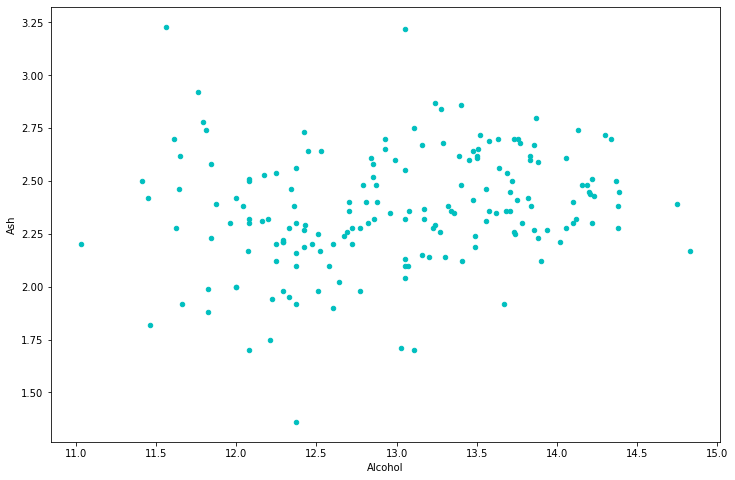

In [83]:
#Probemos solo con dos caracteristicas
colors = np.random.rand(30)
df_origen.plot.scatter(x = 'Alcohol', y = 'Ash', c= 'c', figsize=(12,8), colormap='jet')

In [72]:
df_origen

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Hue,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,0.28,1.04,1
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.05,1
2,13.16,2.36,2.67,18.6,101,2.80,0.30,1.03,1
3,14.37,1.95,2.50,16.8,113,3.85,0.24,0.86,1
4,13.24,2.59,2.87,21.0,118,2.80,0.39,1.04,1
...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.52,0.64,3
174,13.40,3.91,2.48,23.0,102,1.80,0.43,0.70,3
175,13.27,4.28,2.26,20.0,120,1.59,0.43,0.59,3
176,13.17,2.59,2.37,20.0,120,1.65,0.53,0.60,3


In [84]:
Kmeans1 = KMeans(n_clusters=k, init = 'random', max_iter = 300, n_init =10, random_state = 1).fit(df_origen.iloc[:,[0,2]])
df_origen.iloc[:,[0,2]]

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
...,...,...
173,13.71,2.45
174,13.40,2.48
175,13.27,2.26
176,13.17,2.37


<AxesSubplot:xlabel='Alcohol', ylabel='Ash'>

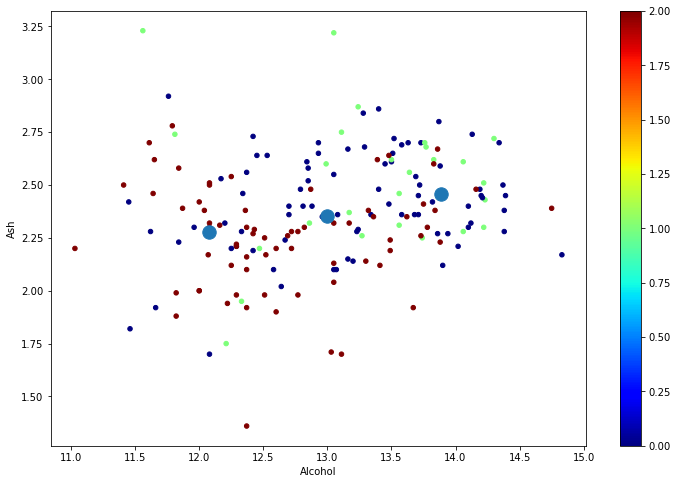

In [85]:
centroids_df = pd.DataFrame(Kmeans1.cluster_centers_, columns = list(df_origen.iloc[:,[0, 2]].columns.values))
fig, ax = plt.subplots(1, 1)
df_origen.plot.scatter(x = 'Alcohol', y = 'Ash', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Alcohol', y = 'Ash', ax = ax,  s = 180, mark_right=False)

In [41]:
# PCA Model
#df2 = pd.read_csv('Wine.csv', sep=",")
#df2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [42]:
#df2 = df2.drop(["Customer_Segment"], axis=1)
#df2.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


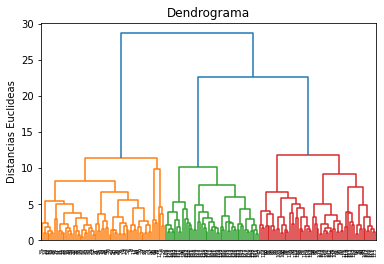

In [87]:
#df2 = df2.drop(["Flavanoids","Proanthocyanins","Color_Intensity","OD280","Proline"], axis=1)
#df2.head()
X = df_escalado.values 
### Dendograma para tener el numero optimo de clusters 
# Se va a usar a usar una librería nueva, y con ello busco ver el numero optimo de clusters 
import scipy.cluster.hierarchy as sch 
# Se usa el metodo 'ward' que intenta minimizar la varianza entre clusters. 
# En lugar de minimizar el WC minimal square, se hace con la varianza 
#-> minimizar la varianza en cada cluster 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) 
plt.title('Dendrograma') 
#plt.xlabel('Clientes') 
plt.ylabel('Distancias Euclideas') 
plt.show()

In [89]:
X = df_origen.iloc[:, 0:len(df_origen.columns)-1].values  # SI los hacemos con el escalado en lugar del origen
y = df_origen.iloc[:, len(df_origen.columns)-1].values

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None) 

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por cada PC")
print(explained_variance)
var_exp = np.round(np.sum(explained_variance[0:5]),4)
print("Con 5 PC se explicaría el {var}% de la varianza".format(var=var_exp*100))

Varianza Explicada por cada PC
[0.32986319 0.2012352  0.14415932 0.11369144 0.07113168 0.05897231
 0.04485195 0.03609491]
Con 5 PC se explicaría el 86.00999999999999% de la varianza


Varianza Explicada por cada PC
[0.32986319 0.2012352  0.14415932 0.11369144 0.07113168]
Parámetros del Modelo
[[-0.17967165  0.40371766  0.133183    0.41212715 -0.20071005 -0.44914211
   0.44903273 -0.41653343]
 [-0.53694669 -0.25596484 -0.60251816 -0.12798868 -0.41222865 -0.25371185
   0.03699138  0.17632495]
 [-0.37925327 -0.35477814  0.45287372  0.55207663 -0.02082629  0.15466094
   0.07620325  0.43618292]
 [-0.38953025  0.0101115  -0.12313596  0.12968898  0.73957143 -0.3209523
  -0.37847747 -0.15152811]
 [-0.24647298  0.4184847   0.019272    0.20111053 -0.38214779  0.35417169
  -0.64787935 -0.17911615]]
accuracy score: 0.9777777777777777


<AxesSubplot:xlabel='PC', ylabel='var'>

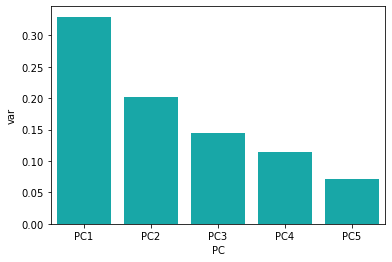

In [94]:
# Se entrena solo para esas 5 componentes principales
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por cada PC")
print(explained_variance)
print("Parámetros del Modelo")
print(pca.components_)

#fitting logistic Regression to training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_pca, y_train)

#predicting results
y_pred = classifier.predict(X_test_pca)
print("accuracy score:", accuracy_score(y_test,y_pred))

# Visualizacion de las PC
sns.barplot(x='PC',y="var",
     data=pd.DataFrame({'var':explained_variance, 'PC':['PC1','PC2','PC3','PC4', 'PC5']}), color="c")

In [95]:
# Regresion Lineal
import statsmodels.api as sm
model = sm.OLS(y_train, X_train_pca).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.102
Model:                            OLS   Adj. R-squared (uncentered):              0.067
Method:                 Least Squares   F-statistic:                              2.901
Date:                Sat, 10 Apr 2021   Prob (F-statistic):                      0.0163
Time:                        16:44:13   Log-Likelihood:                         -282.10
No. Observations:                 133   AIC:                                      574.2
Df Residuals:                     128   BIC:                                      588.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3948      0.110      3.596      0.000       0.178       0.612
x2             0.0761      0.141      0.542      0.589      -0.202       0.354
x3            -0.0679      0.166     -0.409      0.683      -0.397       0.261
x4             0.1881      0.187      1.005      0.317      -0.182       0.558
x5            -0.0769      0.236     -0.325      0.745      -0.545       0.391
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.100
Skew:                          -0.040   Prob(JB):                        0.951
Kurtosis:                       2.892   Cond. No.                         2.15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# RF
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
model.fit(X_train_pca, y_train)
print("Relevancia de los parámetros")
print(model.feature_importances_) 

Relevancia de los parámetros
[0.68204646 0.18073418 0.06919362 0.0410394  0.02698634]


In [96]:
# Usando 2 PC
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#fitting logistic Regression to training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_pca, y_train)

#predicting results
y_pred = classifier.predict(X_test_pca)
print("accuracy score:", accuracy_score(y_test,y_pred))

explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por cada PC")
print(explained_variance)
print("Parámetros del Modelo")
print(pca.components_)

accuracy score: 0.9111111111111111
Varianza Explicada por cada PC
[0.32986319 0.2012352 ]
Parámetros del Modelo
[[-0.17967165  0.40371766  0.133183    0.41212715 -0.20071005 -0.44914211
   0.44903273 -0.41653343]
 [-0.53694669 -0.25596484 -0.60251816 -0.12798868 -0.41222865 -0.25371185
   0.03699138  0.17632495]]


<ipython-input-129-77956b2afaf4>:11: UserWarning: The following kwargs were not used by contour: 'Cmap'
  plt.contourf(X1, X2, pred,alpha = 0.75, Cmap = ListedColormap(('red', 'green')))
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please u

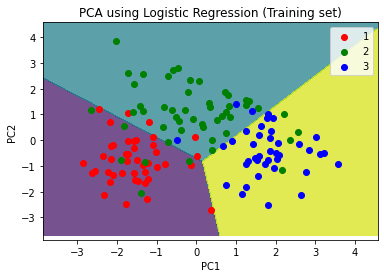

In [129]:
#visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train #X_test_pca, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()- 1,stop = X_set[:, 0].max() + 1,step = 0.01),
                     np.arange(start = X_set[:, 1].min()- 1,stop = X_set[:, 0].max() + 1,step = 0.01))

Xpred = np.array([X1.ravel(), X2.ravel()]).T #.T np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(11)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = classifier.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,alpha = 0.75, Cmap = ListedColormap(('red', 'green')))
           
plt.xlim(X1.min(), X1.max())
plt.ylim(X1.min(), X1.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set == j, 1],

 c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('PCA using Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [104]:
# Metricas de evaluacion
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae)

r2:  0.7566441366087846 mae:  0.12209854676813577


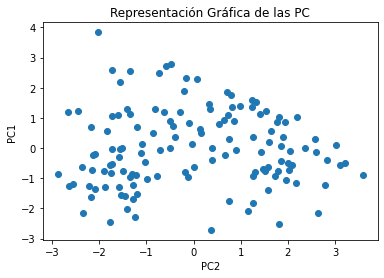

In [105]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.ylabel("PC1")
plt.xlabel("PC2")
plt.title("Representación Gráfica de las PC")
plt.show()